In [1]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
from utiles import *
from sklearn.metrics import cohen_kappa_score, make_scorer

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA, KernelPCA

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading Data

In [2]:
loader = DataHandler("data")
loader.load_all()
data = loader.get_all()
features_names = data.columns[:-1].get_values()

## Preprocessing Data

In [3]:
loader.datos.keys()

dict_keys(['sudan 4 - 5%', 'sudan 4 - 2,5%', 'sudan 2 - 2,5%', 'sudan 4 - 1%', 'sudan 1 - 5%', 'sudan 2 - 1%', 'sudan 1 - 2,5%', 'sudan 2 - 5%', 'sin adulterar', 'para red - 5%', 'sudan 3 - 5%', 'para red - 1%', 'sudan 1 - 1%', 'para red - 2,5%'])

In [4]:
clase = "sudan 4 - 2,5%"
target = np.where(data["clase"] == clase, 0, 1)
np.bincount(target)

array([ 40, 526])

In [5]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN

std = StandardScaler()
scaled_ = std.fit_transform(data.iloc[:,:-1])

X_train, X_test, y_train, y_test = train_test_split(scaled_, target)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, RFECV

def get_features(X, Y, model=None, n_features=20):
    if not model:
#         model = LogisticRegression(class_weight="balanced", n_jobs=-1)
#         model = DecisionTreeRegressor(random_state=15)
        model = RandomForestRegressor(random_state=15, n_estimators=20, n_jobs=-1, max_depth=3)

    rfe = RFE(model, n_features, step=30)
    rfe = rfe.fit(X, Y)
    indices = np.where(rfe.support_)            # Mask of selected features
    return indices

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer

def predict(X_train, Y_train, x_test, y_test, clase, target, raw_data, depth=6, estimators=20, clf=None):
    
    if clf == None:
        clf = RandomForestClassifier(max_depth=depth, n_jobs=4, n_estimators=estimators, criterion="entropy",
                                 min_samples_leaf=5, max_features="auto", class_weight="balanced") #"balanced_subsample")

    clf.fit(X_train, Y_train)

    predicted = clf.predict( x_test )

    cm = confusion_matrix(y_pred=predicted, y_true=y_test)
    plot_confusion_matrix(classes=[clase, "Otros"], cm=cm, norm=True, title="Prb. {}".format(clase))#, size=(6, 6))
    kappa_ = make_scorer(cohen_kappa_score)

    val = cross_val_score(estimator=clf, X=raw_data, y=target, n_jobs=4, scoring=kappa_, cv=4)
    m, s = np.round(np.mean(val), 2), np.round(np.std(val), 2)
    print("{} results:".format( clf.__str__().split("(")[0] ) )
    print("CV results: {}".format(val))
    print("Mean: {}\t Standard deviation: {}".format(m, s))
    print("C-K value matriz actual: {}".format(cohen_kappa_score(y_test, predicted)))

### La selección de frecuencias a utilizar se realiza antes del oversampling


#################	 para red - 1% 	#####################
Frecuencias a utilizar: [4049.847 4994.811 5191.518 5295.656999999999 5345.797 5627.358 5989.916
 6460.47 6892.453 9526.782]


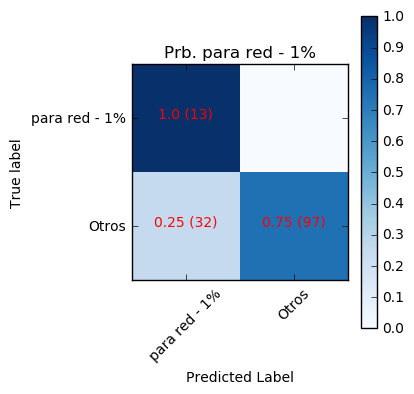

RandomForestClassifier results:
CV results: [ 0.50615302  0.50522648  0.70440252  0.46469248]
Mean: 0.55	 Standard deviation: 0.09
C-K value: 0.35692046419473544
******************************************************************************



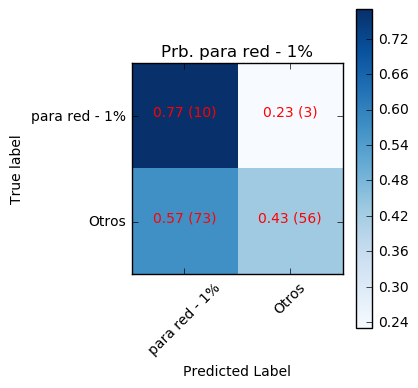

DummyClassifier results:
CV results: [ 0.03470483  0.03470483  0.03591941  0.03197049]
Mean: 0.03	 Standard deviation: 0.0
C-K value: 0.05943873104409969

#################	 para red - 2,5% 	#####################
Frecuencias a utilizar: [4308.266 4744.106 5129.806 5164.519 5210.803 5214.66 5928.204000000001
 6298.476 6576.18 6757.4580000000005]


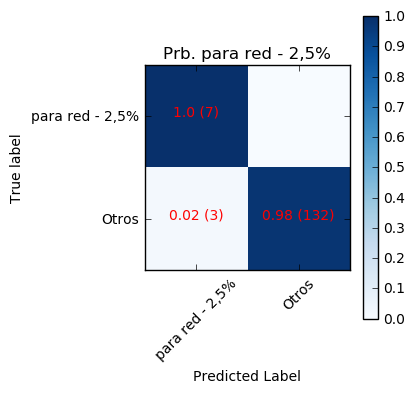

RandomForestClassifier results:
CV results: [ 1.          1.          0.94357743  0.94357743]
Mean: 0.97	 Standard deviation: 0.03
C-K value: 0.8126649076517151
******************************************************************************



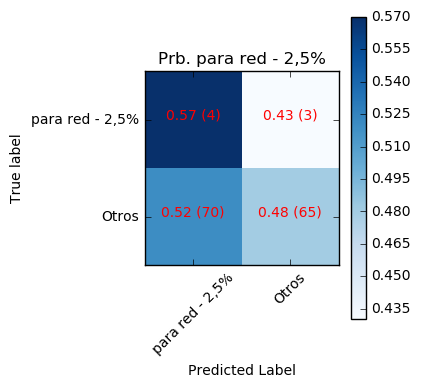

DummyClassifier results:
CV results: [-0.00935279  0.03052209 -0.01037149 -0.01037149]
Mean: 0.0	 Standard deviation: 0.02
C-K value: 0.009554748710108862

#################	 para red - 5% 	#####################
Frecuencias a utilizar: [4547.399 5885.776999999999 5935.918000000001 5966.774 5970.630999999999
 5993.773 6059.342 6738.173000000001 9935.623 9997.335]


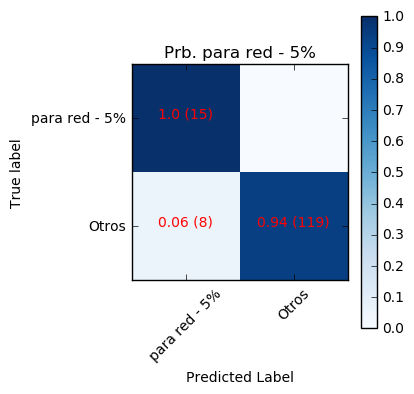

RandomForestClassifier results:
CV results: [ 0.94360604  1.          1.          0.5048288 ]
Mean: 0.86	 Standard deviation: 0.21
C-K value: 0.7586060348491288
******************************************************************************



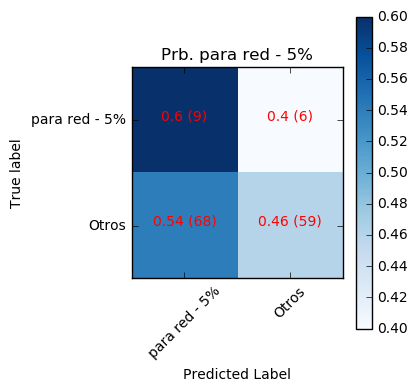

DummyClassifier results:
CV results: [-0.03292496 -0.03292496  0.06370616 -0.00675415]
Mean: -0.0	 Standard deviation: 0.04
C-K value: 0.022875209224474613

#################	 sin adulterar 	#####################
Frecuencias a utilizar: [4825.103 4994.811 4998.668 5164.519 5334.227 5457.65 5781.638000000001
 5962.9169999999995 5970.630999999999 5974.488]


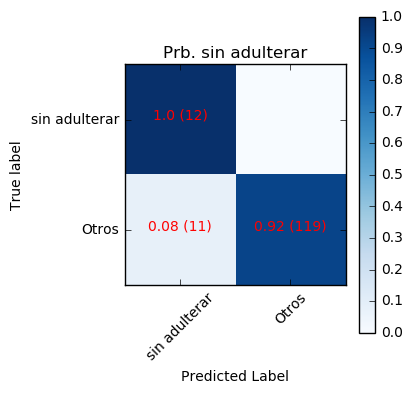

RandomForestClassifier results:
CV results: [ 0.89256198  0.29638591  0.60702341  0.94357743]
Mean: 0.68	 Standard deviation: 0.26
C-K value: 0.6464463558171119
******************************************************************************



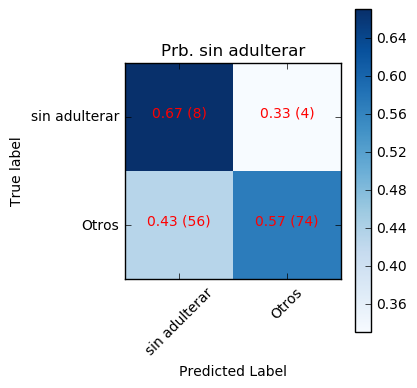

DummyClassifier results:
CV results: [ 0.01995565  0.03444698  0.0051878   0.0051878 ]
Mean: 0.02	 Standard deviation: 0.01
C-K value: 0.07951598962834916

#################	 sudan 1 - 1% 	#####################
Frecuencias a utilizar: [4342.979 4497.258 4709.393 4728.678 4963.955 7166.3 7563.571 8404.396
 8682.1 9943.338]


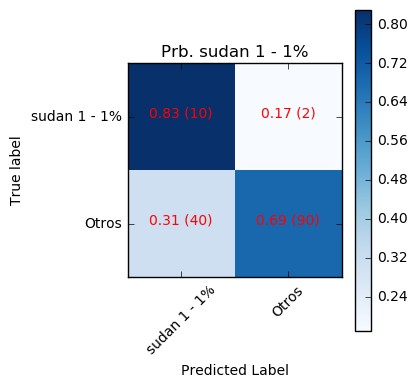

RandomForestClassifier results:
CV results: [ 0.18129404  0.32401071  0.5101737   0.07024083]
Mean: 0.27	 Standard deviation: 0.16
C-K value: 0.2156759600210416
******************************************************************************



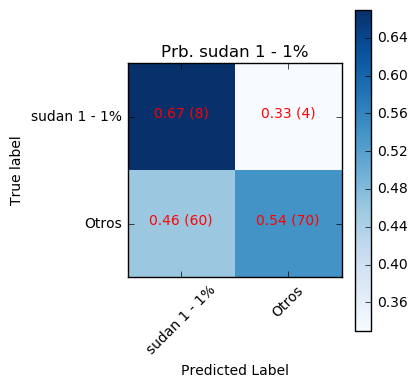

DummyClassifier results:
CV results: [-0.01058844 -0.01058844  0.00279403 -0.0009999 ]
Mean: -0.0	 Standard deviation: 0.01
C-K value: 0.0657894736842104

#################	 sudan 1 - 2,5% 	#####################
Frecuencias a utilizar: [4331.407999999999 4339.122 4346.835 4350.692 5118.235 5249.3730000000005
 5253.229 5257.0869999999995 5284.085 8824.809000000001]


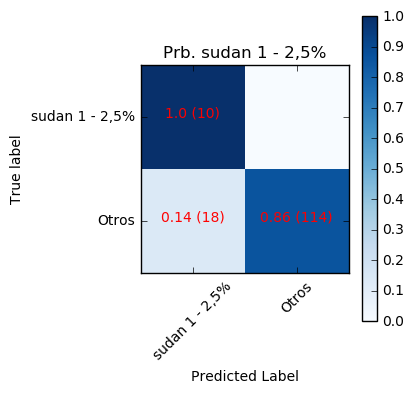

RandomForestClassifier results:
CV results: [ 0.83116883  0.41168289  0.6339775   0.88141295]
Mean: 0.69	 Standard deviation: 0.19
C-K value: 0.47146401985111663
******************************************************************************



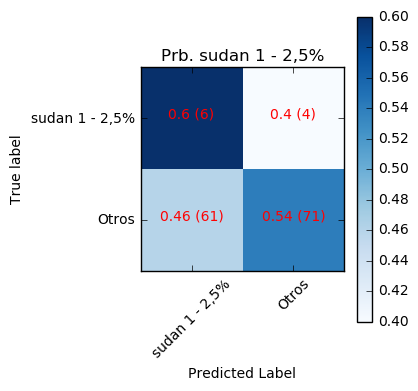

DummyClassifier results:
CV results: [-0.07598372  0.04154079 -0.02945619 -0.02945619]
Mean: -0.02	 Standard deviation: 0.04
C-K value: 0.03794037940379413

#################	 sudan 1 - 5% 	#####################
Frecuencias a utilizar: [4261.981 4281.267 4285.124 4288.98 4323.693 4339.122 4362.264 4790.39
 6175.052 8292.543]


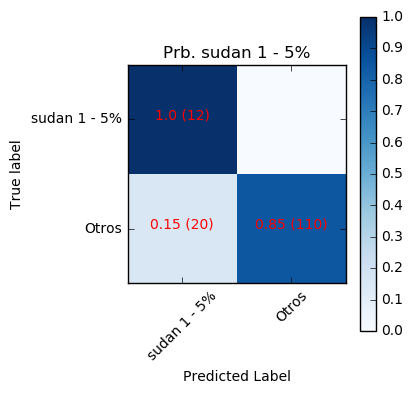

RandomForestClassifier results:
CV results: [ 0.83108644  0.3707905   0.47705146  1.        ]
Mean: 0.67	 Standard deviation: 0.26
C-K value: 0.4817518248175182
******************************************************************************



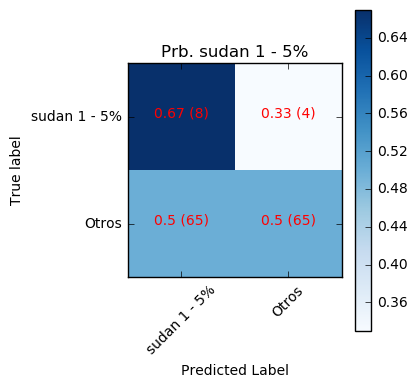

DummyClassifier results:
CV results: [-0.00337482 -0.00337482  0.10307278  0.10307278]
Mean: 0.05	 Standard deviation: 0.05
C-K value: 0.05039736383019966

#################	 sudan 2 - 1% 	#####################
Frecuencias a utilizar: [4211.840999999999 4327.55 4381.548 4570.542 4589.826 4940.813 5091.236
 5206.946 5226.23 7228.012]


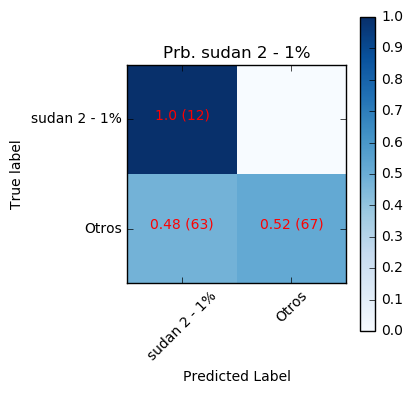

RandomForestClassifier results:
CV results: [ 0.08950537  0.42877425  0.40706476  0.26235226]
Mean: 0.3	 Standard deviation: 0.14
C-K value: 0.15235929505400803
******************************************************************************



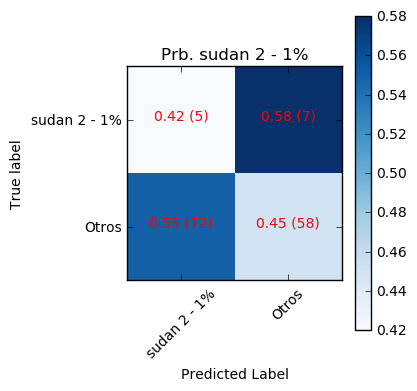

DummyClassifier results:
CV results: [ 0.01283422  0.0730369   0.00735526 -0.02332815]
Mean: 0.02	 Standard deviation: 0.03
C-K value: -0.039666357738646685

#################	 sudan 2 - 2,5% 	#####################
Frecuencias a utilizar: [5098.95 5102.807 5125.9490000000005 5141.377 5206.946 5276.371999999999
 5330.37 5453.793000000001 5908.919 6784.4580000000005]


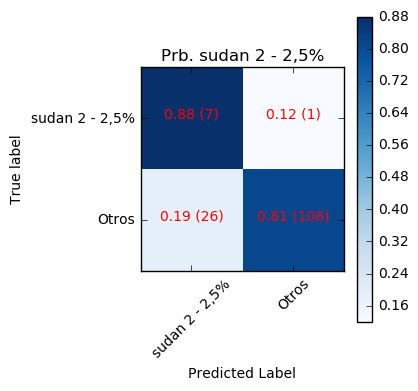

RandomForestClassifier results:
CV results: [ 0.33288591  0.63682864  0.66912504  0.63659794]
Mean: 0.57	 Standard deviation: 0.14
C-K value: 0.27578390630902916
******************************************************************************



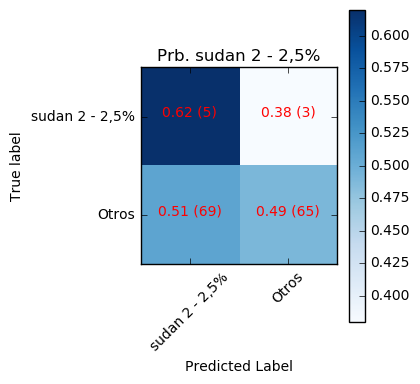

DummyClassifier results:
CV results: [ 0.03293352 -0.02480179 -0.02407138  0.01831187]
Mean: 0.0	 Standard deviation: 0.03
C-K value: 0.022562141491395793

#################	 sudan 2 - 5% 	#####################
Frecuencias a utilizar: [4744.106 5230.088 5245.516 5257.0869999999995 5260.944 5264.8009999999995
 7135.444 7231.869000000001 8770.811 9873.911]


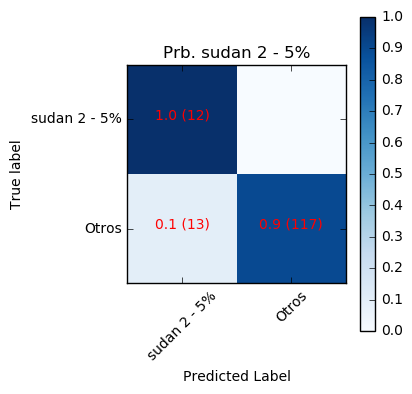

RandomForestClassifier results:
CV results: [ 1.          0.63423011  0.84567676  0.89236641]
Mean: 0.84	 Standard deviation: 0.13
C-K value: 0.6033519553072626
******************************************************************************



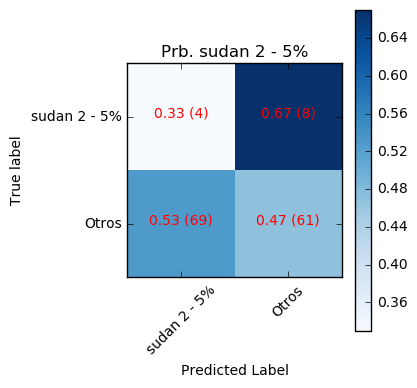

DummyClassifier results:
CV results: [ 0.          0.         -0.10749551  0.05539446]
Mean: -0.01	 Standard deviation: 0.06
C-K value: -0.05970149253731338

#################	 sudan 3 - 5% 	#####################
Frecuencias a utilizar: [4994.811 5901.205 6024.629 6097.911999999999 6151.91 7008.1630000000005
 7093.017 7104.588000000001 8959.804 9951.052]


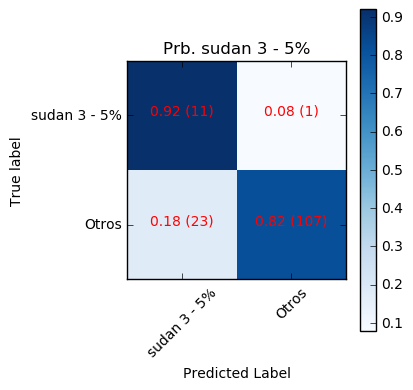

RandomForestClassifier results:
CV results: [ 0.15514874  0.71551231  0.84567676  1.        ]
Mean: 0.68	 Standard deviation: 0.32
C-K value: 0.40377886634009796
******************************************************************************



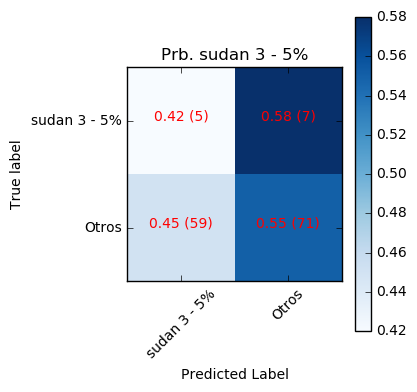

DummyClassifier results:
CV results: [ 0.04862175  0.04862175  0.07487457 -0.01211895]
Mean: 0.04	 Standard deviation: 0.03
C-K value: -0.012532411408815891

#################	 sudan 4 - 1% 	#####################
Frecuencias a utilizar: [4138.558 4628.396 5214.66 5226.23 5395.938 5411.366999999999 5804.78
 5974.488 8307.971 9349.36]


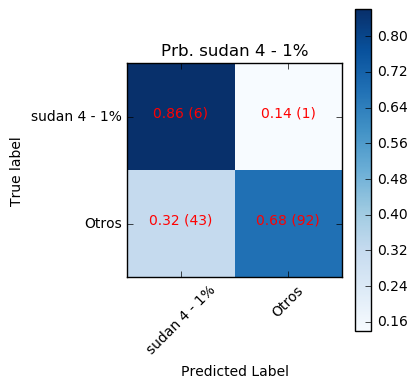

RandomForestClassifier results:
CV results: [ 0.22670432  0.3079922   0.33988764  0.16836461]
Mean: 0.26	 Standard deviation: 0.07
C-K value: 0.1401045967519956
******************************************************************************



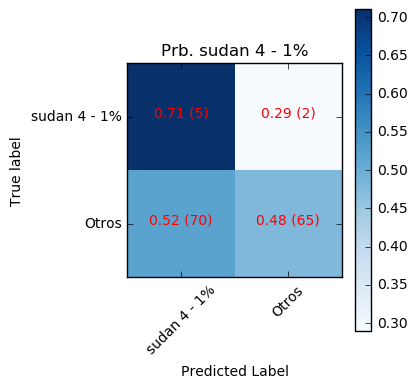

DummyClassifier results:
CV results: [ 0.         -0.05633803  0.03698645 -0.05739426]
Mean: -0.02	 Standard deviation: 0.04
C-K value: 0.034925429488389614

#################	 sudan 4 - 2,5% 	#####################
Frecuencias a utilizar: [5060.38 5075.808 5206.946 5264.8009999999995 5361.226 5434.508000000001
 5797.066 5993.773 7764.134 8620.388]


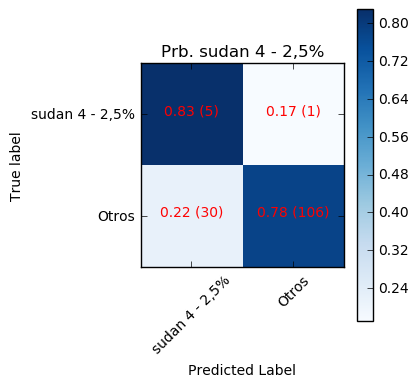

RandomForestClassifier results:
CV results: [ 0.30717013  0.5748503   0.73595506  0.36690186]
Mean: 0.5	 Standard deviation: 0.17
C-K value: 0.185116623472788
******************************************************************************



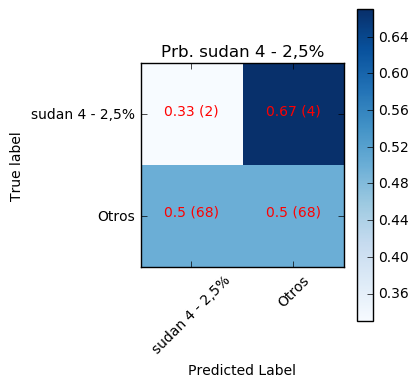

DummyClassifier results:
CV results: [ 0.04377104 -0.00935279  0.02719728 -0.00858369]
Mean: 0.01	 Standard deviation: 0.02
C-K value: -0.02733118971061077

#################	 sudan 4 - 5% 	#####################
Frecuencias a utilizar: [4084.56 4936.956 5110.521 5392.081999999999 5395.938 5399.795 5986.059
 5989.916 5993.773 5997.63]


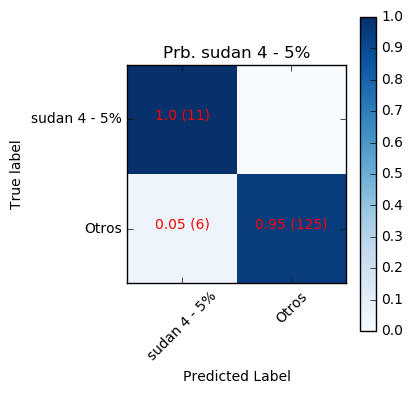

RandomForestClassifier results:
CV results: [ 0.51559454  0.68777485  1.          0.94357743]
Mean: 0.79	 Standard deviation: 0.2
C-K value: 0.7634647418101055
******************************************************************************



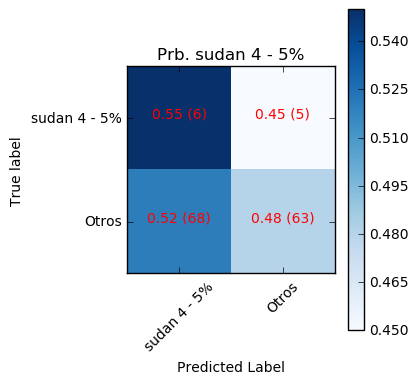

DummyClassifier results:
CV results: [-0.07828877  0.01720913 -0.07821717  0.04520744]
Mean: -0.02	 Standard deviation: 0.06
C-K value: 0.007278299176402991


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

for c in np.unique(data.clase):
    target = np.where(data["clase"]==c, 0, 1)

    X_train, x_test, Y_train, y_test = train_test_split(scaled_, target, test_size=.25)
    indices = get_features(X_train, Y_train, n_features=10)

    print("\n#################\t {} \t#####################".format(c))
    print("Frecuencias a utilizar: {}".format( features_names[indices[0]] ))
    
    ad = ADASYN(ratio="minority", random_state=15, n_jobs=4)
    X_train, Y_train = ad.fit_sample(X_train, Y_train)
    
    pca = PCA(svd_solver="randomized", random_state=15)

    new_data = pca.fit_transform( scaled_[:, indices[0]] )
    X_train = pca.transform(X_train[:,indices[0]])
    x_test = pca.transform(x_test[:,indices[0]])
    predict(X_train, Y_train, x_test, y_test, c, target, new_data, depth=3, estimators=20)   
    print("******************************************************************************\n") 
    d_clf = DummyClassifier(strategy="uniform")
    predict(X_train, Y_train, x_test, y_test, c, target, new_data, clf=d_clf)

## Realizando Oversampling antes de la selección de features

In [ ]:
for c in np.unique(data.clase):
    target = np.where(data["clase"]==c, 0, 1)

    X_train, x_test, Y_train, y_test = train_test_split(scaled_, target, test_size=.25)
 
    ad = ADASYN(ratio="minority", random_state=15, n_jobs=4)
    X_train, Y_train = ad.fit_sample(X_train, Y_train)
    print("\n#################\t {} \t#####################".format(c))
    print("Cant. elementos (cls_0, cls_1):{}".format( np.bincount(Y_train) ) )

    indices = get_features(X_train, Y_train, n_features=10)
    print("Frecuencias a utilizar: {}".format( features_names[indices[0]] ))
    
    pca = PCA(svd_solver="randomized", random_state=15)

    new_data = pca.fit_transform( scaled_[:, indices[0]] )
    X_train = pca.transform(X_train[:,indices[0]])
    x_test = pca.transform(x_test[:,indices[0]])
    print("con PCA")
    predict(X_train, Y_train, x_test, y_test, c, target, new_data, depth=3, estimators=20)   
    print("******************************************************************************") 
    d_clf = DummyClassifier(strategy="uniform")
    predict(X_train, Y_train, x_test, y_test, c, target, new_data, clf=d_clf)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(max_depth=3, n_jobs=4, n_estimators=40, criterion="entropy",
#                              min_samples_leaf=5, max_features="auto", class_weight="balanced")

# clf.fit(new_X_train[:, indices[0]], new_y_train)

# predicted = clf.predict( X_test[:, indices[0]] )

# cm = confusion_matrix(y_pred=predicted, y_true=y_test)
# plot_confusion_matrix(classes=[clase, "Otros"], cm=cm, norm=True, title="Prb. {}".format(clase), size=(4, 4))
# kappa_ = make_scorer(cohen_kappa_score)

# val = cross_val_score(estimator=clf, X=scaled_[:, indices[0]], y=target, n_jobs=4, scoring="f1", cv=3)
# print(val)
# print("C-K value: {}".format(cohen_kappa_score(y_test, predicted)))

In [ ]:
# from sklearn.dummy import DummyClassifier

# d_clf = DummyClassifier(strategy="uniform")
# d_clf.fit(new_X_train[:, indices[0]], new_y_train)

# d_predicted = d_clf.predict( X_test[:, indices[0]] )

# d_cm = confusion_matrix(y_pred=d_predicted, y_true=y_test)
# plot_confusion_matrix(classes=[clase, "Otros"],
#                       cm=d_cm, norm=True, title="Prb. {} (Dummy)".format(clase),
#                       size=(6, 6))

# kappa_ = make_scorer(cohen_kappa_score)

# val = cross_val_score(estimator=d_clf, X=scaled_[:, indices[0]], y=target, n_jobs=4, scoring="f1", cv=3)
# print(val)
# print("C-K value: {}".format(cohen_kappa_score(y_test, d_predicted)))